# Homework 1 - Foundations of Data Analysis

## 1. Data Explorations (10%)

### a. 按字母順序排序。繪製特徵之間的相關性熱圖，問對角線元素始終為 1 的原因 (4%)
- ans: {對角線始終為1的原因為，每個特徵與自己本身為線性相關。從公式來看，其分子的cov(x,x)為x變異數的平方，其分母也是變異數的平方，因此為1。}

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss

Text(0.5, 1.0, 'Feature Correlation Heatmap')

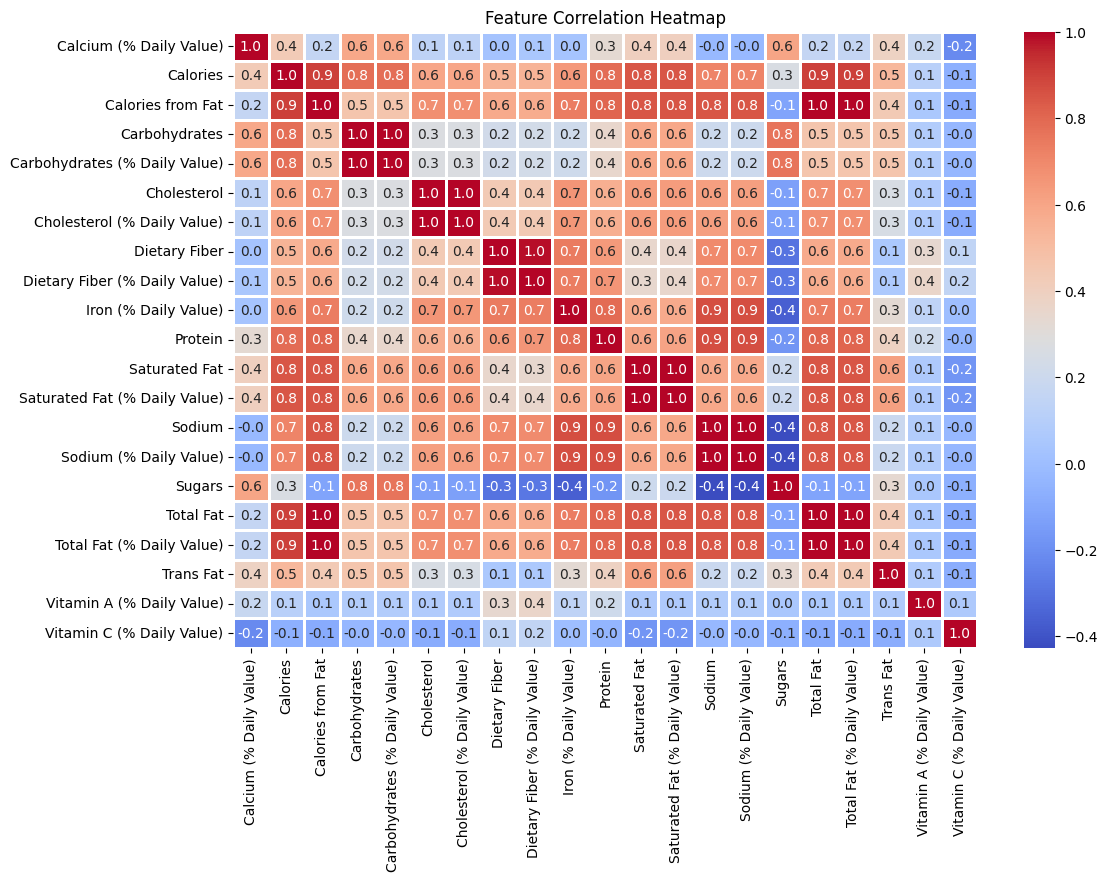

In [ ]:
# your code here

# 讀取csv檔
df = pd.read_csv("menu.csv")
# 去除前三個column
df = df.iloc[:,3:]
#print(df) 測試df輸出

# 特徵排序
df = df[sorted(df.columns)]

# 計算特徵之間的相關係數矩陣
corrMatrix = df.corr()

# 設定圖形大小
plt.figure(figsize=(12,8))

# 繪製熱力圖
sns.heatmap(corrMatrix,annot=True,fmt=".1f",cmap="coolwarm",linewidths=0.8)

# 設定圖形標題
plt.title("Feature Correlation Heatmap")

### b. 列出與卡路里有第二大正相關的特徵 (2%)
- ans: {我先將corrMatrix裡的Calories那一行取出，然後對他們的值進行排序最後得到第二大的特徵為Caliories from fat。}


In [3]:
#print(corrMatrix['Calories'])

#排序carolies相關係數的大小
Calories=corrMatrix['Calories'].sort_values(ascending=False)
#print(Calories)

print(f"第二大特徵:{Calories.index[1]}")

第二大特徵:Calories from Fat


### c. 為 (b) 的特徵和 calories 畫散點圖 (2%)

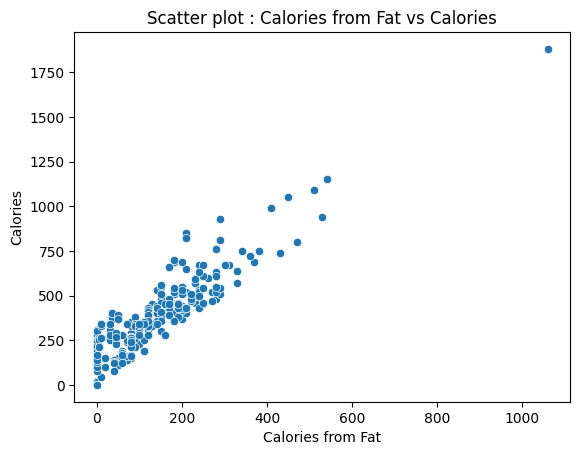

In [4]:
# your code here

#畫出第二大正相關特徵與Calories之散點圖
sns.scatterplot(x=df[Calories.index[1]],y=df["Calories"])
plt.title(f"Scatter plot : {Calories.index[1]} vs Calories")
plt.xlabel(Calories.index[1])
plt.ylabel("Calories")
plt.show()

#sns.scatterplot(x=df[Calories.index[2]],y=df["Calories"])
#plt.title(f"Scatter plot : {Calories.index[2]} vs Calories")
#plt.xlabel(Calories.index[2])
#plt.ylabel("Calories")
#plt.show

### d. 為卡路里、總脂肪、蛋白質和碳水化合物特徵繪製箱形圖 (2%)

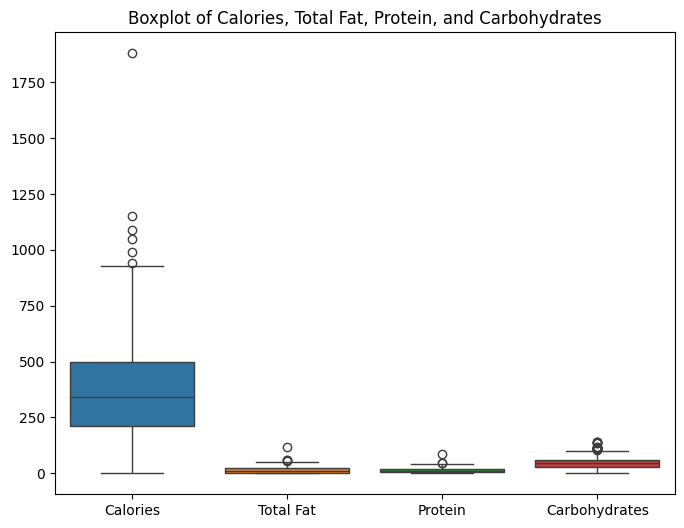

In [ ]:
# your code here

#繪製Calories、fat、protein、Carbohydrates的箱型圖
features=['Calories','Total Fat','Protein','Carbohydrates']  #建立特徵串列

#顯示箱形圖
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[features])
plt.title('Boxplot of Calories, Total Fat, Protein, and Carbohydrates')
plt.show()

## 2. Pre-processing (10%)

### a. 報告所有數值特徵的中位數和標準差 (2%)

In [7]:
# your code here

#計算df中所有特徵的中位數
median=df.median()
print(f"Median of all feature:\n{median}\n")

#計算df中所有特徵的樣本標準差
std=df.std()
print(f"Std of all feature:\n{std}\n")

#計算df中所有特徵的平均
#mean=df.mean()
#print(f"Mean of all feature:\n{mean}")

Median of all feature:
Calcium (% Daily Value)           20.0
Calories                         340.0
Calories from Fat                100.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Cholesterol                       35.0
Cholesterol (% Daily Value)       11.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Iron (% Daily Value)               4.0
Protein                           12.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Sugars                            17.5
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Trans Fat                          0.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
dtype: float64

Std of all feature:
Calcium (% Daily Value)           17.019953
Calories                         240.269886
Calories from Fat                1

### b. 將(3a)中所有數值特徵的離群值替換為NaN，並回報每個特徵對應的NaN總數 (3%)

In [8]:
# your code here

#迭代每一個column物件
for column in df.columns:
    mean=df[column].mean() #計算該column之平均數
    Std=df[column].std()   #計算該column之標準差
    outliers=(df[column]-mean).abs()>3*Std #標記該column中之離群值(減去平均數後取絕對值大於三個標準差者)
    #df[column][outliers]=np.nan
    df.loc[outliers, column] = np.nan  #將標記值替換為NaN
nanCounts = df.isna().sum()  #計算NaN之數量
print("\nNumber of NaN values for each feature after replacing outliers:\n", nanCounts)




Number of NaN values for each feature after replacing outliers:
 Calcium (% Daily Value)          0
Calories                         3
Calories from Fat                3
Carbohydrates                    5
Carbohydrates (% Daily Value)    5
Cholesterol                      4
Cholesterol (% Daily Value)      4
Dietary Fiber                    4
Dietary Fiber (% Daily Value)    4
Iron (% Daily Value)             3
Protein                          2
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Sodium                           3
Sodium (% Daily Value)           3
Sugars                           3
Total Fat                        3
Total Fat (% Daily Value)        3
Trans Fat                        9
Vitamin A (% Daily Value)        6
Vitamin C (% Daily Value)        7
dtype: int64


### c. 將缺失值（NaN）替換為平均值，回報中位數和標準差。將結果與(3a)比較，並用一句話解釋你的發現 (5%)
- ans: {中位數並沒有變化，推測是剛好替換後沒有影響到排序。但可以很明顯的發現標準差都有所下降，推測是離群值替換成平均數後數據變得更加集中。}

In [9]:
# your code here
df=df.fillna(df.mean()) #將NaN值替換為平均值
median_3C=df.median()   #計算中位數
std_3C=df.std()         #計算標準差
print("\nMedian after replacing NaN with mean:\n", median_3C.round(2))
print("\nStandard deviation after replacing NaN with mean:\n", std_3C.round(2))


Median after replacing NaN with mean:
 Calcium (% Daily Value)           20.0
Calories                         340.0
Calories from Fat                100.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Cholesterol                       35.0
Cholesterol (% Daily Value)       11.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Iron (% Daily Value)               4.0
Protein                           12.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Sugars                            17.5
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Trans Fat                          0.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
dtype: float64

Standard deviation after replacing NaN with mean:
 Calcium (% Daily Value)           17.02
Calories                         2

## 3. Linear Regression (20%)

### a. 使用所有資料訓練一個線性預測器來預測卡路里，回報b、w₁、w₂和w₃的值並解釋它們在現實世界中的含義 (10%)
- ans: {截距 b: -1.83(根據當下執行結果可能有變)、總脂肪的權重 w₁: 9.02(根據當下執行結果可能有變)、蛋白質的權重 w₂: 4.05(根據當下執行結果可能有變)、碳水化合物的權重 w₃: 3.98(根據當下執行結果可能有變)。代表三種營養素每增加一單位便會提供9大卡、4大卡、4大卡的熱量。截距b應該是在預測時略微校正總卡路里值以減少誤差。} 

In [10]:
# your code here
df =pd.read_csv("menu.csv")
df=df.iloc[:,3:]

In [11]:
X=df[['Total Fat', 'Protein', 'Carbohydrates']]  #找到特定特徵
Y=df[['Calories']]                               #找到預測結果

model=linear_model.LinearRegression()  #設定模型

model.fit(X,Y)   #訓練模型

b=model.intercept_   #得出特徵權重
w=model.coef_        #得出截距

print(f"截距 b: {b[0]:.2f}")
print(f"總脂肪的權重 w₁: {w[0][0]:.2f}")
print(f"蛋白質的權重 w₂: {w[0][1]:.2f}")
print(f"碳水化合物的權重 w₃: {w[0][2]:.2f}")

截距 b: -1.83
總脂肪的權重 w₁: 9.02
蛋白質的權重 w₂: 4.05
碳水化合物的權重 w₃: 3.98


### b. 使用所有資料訓練另一個線性預測器來預測卡路里，回報b和w₁的值，並解釋與(a)中的w₁之差異 (10%)
- ans: {截距 b: 151.59(根據當下執行結果可能有變)、總脂肪的權重 w₁: 15.30(根據當下執行結果可能有變)。由於總卡路里是受到碳水、蛋白質、脂肪的影響，因此在(a)中這三個變量可以被合理分配，較貼近我們的常識。但(b)只用脂肪一個變數就想要解釋總卡路里這樣會使得脂肪的權重大於(a)得出的結果，增加脂肪的影響。}

In [12]:
# your code here
X=df[['Total Fat']]   #找到特定特徵
Y=df[['Calories']]    #找到預測結果

model=linear_model.LinearRegression()   #設定模型

model.fit(X,Y)     #訓練模型

b=model.intercept_ #得出截距
w=model.coef_ #得出權重

print(f"截距 b: {b[0]:.2f}")
print(f"總脂肪的權重 w₁: {w[0][0]:.2f}")

截距 b: 151.59
總脂肪的權重 w₁: 15.30


## 4. Logistic Regression (25%)

### a. 計算卡路里的中位數，回報中位數以及分別標記為1和0的項目數量 (3%)

In [13]:
# your code here
df =pd.read_csv("menu.csv")
df=df.iloc[:,3:]

In [14]:
CaloriesMedian=df['Calories'].median() #計算中位數
Calories=df['Calories'].copy()  #將Calories這一column複製一份
print(f"中位數:{CaloriesMedian}") #印出中位數
print("==========================")
num1=0
num0=0
for i in Calories.index:
    if(Calories[i]>=CaloriesMedian):
        Calories[i]=1
        num1+=1
    else:
        Calories[i]=0
        num0+=1
print(Calories)  #測試Calories結果
print("==========================")
print(f"1的數量有:{num1},0的數量有:{num0}")  #印出1的數量與0的數量


中位數:340.0
0      0
1      0
2      1
3      1
4      1
      ..
255    1
256    1
257    1
258    1
259    1
Name: Calories, Length: 260, dtype: int64
1的數量有:133,0的數量有:127


### b. 根據檔案中出現的順序將資料在訓練資料上訓練邏輯迴歸，並根據預測結果繪製混淆矩陣，回報預測結果的準確率、精確率、召回率和F1分數 (9%)

Accuracy: 0.96
Precision: 0.95
Recall: 1.00
F1 Score: 0.98
train loss:0.02
test loss:0.04


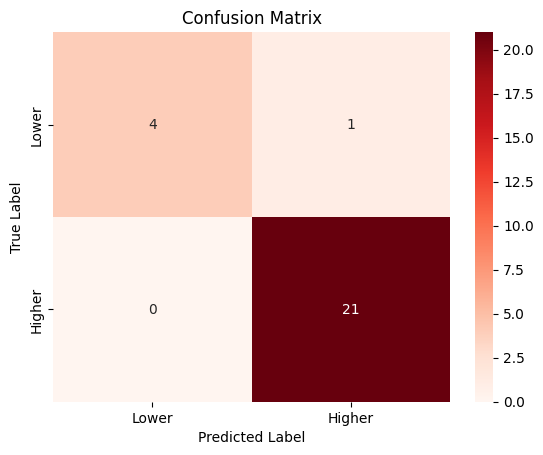

In [15]:
# your code here

#設定特徵與預測結果
X=df[['Total Fat', 'Protein', 'Carbohydrates']]
Y=Calories

#分成90%訓練集10%測試集
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,shuffle=False)
#訓練損失、測試損失
train_loss , test_loss =0 ,0

#設定與訓練模型
model=linear_model.LogisticRegression()
model.fit(X_train,y_train)

#訓練損失
train_loss=log_loss(y_train,model.predict_proba(X_train))

#預測與預測損失
y_pred = model.predict(X_test)
test_loss=log_loss(y_test,model.predict_proba(X_test))

#計算評估指標
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#顯示結果
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"train loss:{train_loss:.2f}")
print(f"test loss:{test_loss:.2f}")

#製作混淆矩陣
confMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confMatrix,annot=True,fmt="d",cmap="Reds",xticklabels=["Lower","Higher"],yticklabels=["Lower","Higher"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### c. 使用4(b)中相同的資料分割，在訓練資料和所有21個特徵上訓練邏輯迴歸，根據預測結果繪製混淆矩陣，回報預測結果的準確率、精確率、召回率和F1分數 (9%)

Accuracy: 0.62
Precision: 1.00
Recall: 0.52
F1 Score: 0.69
train loss:0.37
test loss:1.08


c:\Users\user\miniconda3\envs\datamining\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


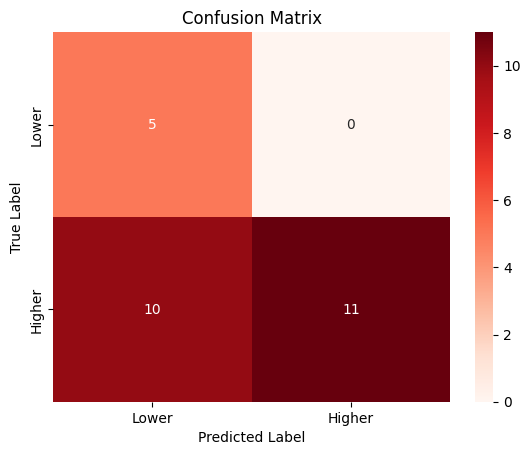

In [16]:
# your code here

#設定特徵與預測結果
X=df
Y=Calories

#分成90%訓練集與10%測試集
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,shuffle=False)
train_loss ,test_loss = 0 ,0 

#設定模型、訓練模型、計算訓練損失
model=linear_model.LogisticRegression()
model.fit(X_train,y_train)
train_loss=log_loss(y_train,model.predict_proba(X_train))

# 預測與預測損失
y_pred = model.predict(X_test)
test_loss=log_loss(y_test,model.predict_proba(X_test))

# 計算評估指標
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

# 顯示結果
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"train loss:{train_loss:.2f}")
print(f"test loss:{test_loss:.2f}")

# 製作混淆矩陣
confMatrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confMatrix, annot=True,fmt="d",cmap="Reds",xticklabels=["Lower", "Higher"],yticklabels=["Lower", "Higher"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### d. 比較4(b)和4(c)的訓練損失和測試損失，哪個可能是更好的模型？解釋你的理由(4%)
- ans: {比較兩者的訓練與測試損失後可以發現只用3個特徵進行訓練的模型兩個損失皆低於用21的特徵進行訓練的模型，因此(b)的模型優於(c)，推測是因為(c)內的模型擁有太多不必要的特徵導致過擬合，模型過於複雜化無法著重在重要的資訊上。} 


## 5. Cross Validation (15%)

### a. 使用與4(c)相同的公式進行5折交叉驗證。通過填寫下表報告訓練和驗證損失。根據表格解釋哪個模型可能具有最佳泛化能力 (12%)
- ans: {根據訓練損失降序排列折數為 3 -> 1 -> 4 -> 5 -> 2。從表格中可以看出2的訓練損失為最低，且他的驗證損失也同時是最低的代表其在未見過的資料中表現較佳擁有最好的泛化能力。}

In [17]:
# your code here
X = df
Y = Calories

#區分90%訓練集與10%測試集
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=42,shuffle=True)

#設定交叉驗證折數
kf = KFold(n_splits=5,shuffle=True,random_state=42)

trainLoss=[]
valLoss=[]

bestValLoss=100
bestModel=None

for trainIndex,valIndex in kf.split(X_train):
    X_fold_train,X_fold_val = X_train.iloc[trainIndex], X_train.iloc[valIndex]  #根據折數切出每一份特徵
    y_fold_train,y_fold_val = y_train.iloc[trainIndex], y_train.iloc[valIndex]  #根據折數切出每一份預測結果
    
    model=linear_model.LogisticRegression() #設定模型
    model.fit(X_fold_train,y_fold_train)    #訓練模型
    
    #計算誤差
    train_loss =log_loss(y_fold_train,model.predict_proba(X_fold_train))
    val_loss =log_loss(y_fold_val,model.predict_proba(X_fold_val))
    
    trainLoss.append(train_loss)
    valLoss.append(val_loss)
    
    #儲存最佳模型
    if(val_loss<bestValLoss):
        bestModel=model

#建立訓練損失與驗證損失的dataframe
cvResults = pd.DataFrame({
    "1": ["1",trainLoss[0],valLoss[0]],
    "2": ["2",trainLoss[1],valLoss[1]],
    "3": ["3",trainLoss[2],valLoss[2]],
    "4": ["4",trainLoss[3],valLoss[3]],
    "5": ["5",trainLoss[4],valLoss[4]],
},index=["折數","訓練損失","驗證損失"])  
display(cvResults)

c:\Users\user\miniconda3\envs\datamining\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\miniconda3\envs\datamining\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

,1,2,3,4,5
折數,1,2,3,4,5
訓練損失,0.388785,0.310932,0.409188,0.38784,0.350764
驗證損失,0.641426,0.353488,0.527322,0.396198,0.517356


### b. 將5(a)中確定的最具泛化能力的模型應用於測試資料後，它是否比4(c)中的模型具有更好的準確率？解釋為什麼或為什麼不 (3%)
- ans: {從準確度中可以發現5(a)的模型是優於4(c)的模型的。因為我們透過交叉驗證找到一個泛化性最佳的模型，而4(c)是在固定資料集下訓練可能會有過擬合的情況發生。}

In [18]:
# your code here

y_pred=bestModel.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


## 6. Regularization  

### a. 為4(c)中的二元分類器添加L2範數正則化項，根據訓練損失和驗證損失繪製學習曲線，以選擇超參數λ₂，並使用5折平均訓練損失來表示此性能。回報圖表、最佳λ₂，以及使用最佳λ₂在測試資料上的準確率 (7%)

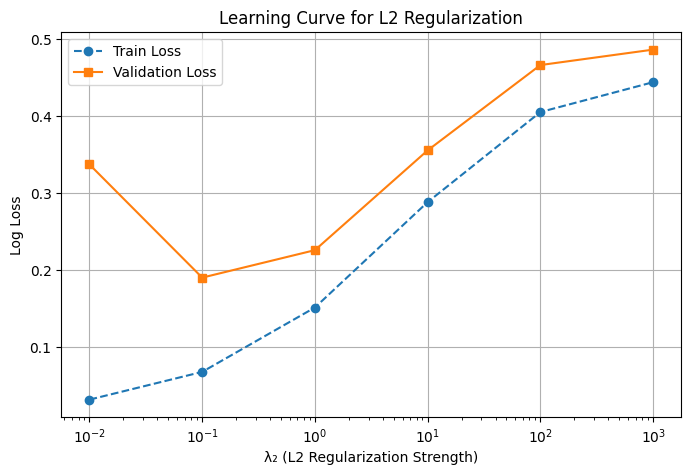

Best Lambda:0.10
Test accuracy with Best Lambda:0.9615384615384616


In [ ]:
# your code here

X=df
Y=Calories

#切分資料集
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=12,shuffle=True)

#設定折數
kf = KFold(n_splits=5, shuffle=True,random_state=12)

trainLoss=[]
valLoss=[]
#建立lambda2的列表
lambda2Values = [0.01,0.1,1,10,100,1000]

for lambda2 in lambda2Values:
    C_values=1/lambda2  #根據lambda2計算C值
    train_loss_fold=[]
    val_loss_fold=[]
    
    for trainIndex , valIndex in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[trainIndex], X_train.iloc[valIndex]
        y_fold_train, y_fold_val = y_train.iloc[trainIndex], y_train.iloc[valIndex]
        
        model=linear_model.LogisticRegression(penalty="l2",C=C_values,solver="liblinear")   #模型設定，solver選擇liblinear可用於二分類
        model.fit(X_fold_train,y_fold_train)
        train_loss_fold.append(log_loss(y_fold_train,model.predict_proba(X_fold_train)))  #收集訓練損失
        val_loss_fold.append(log_loss(y_fold_val,model.predict_proba(X_fold_val)))        #收集驗證損失
        
    trainLoss.append(np.mean(train_loss_fold))   #計算平均訓練損失
    valLoss.append(np.mean(val_loss_fold))       #計算平均驗證損失

#顯示結果
plt.figure(figsize=(8,5))
plt.plot(lambda2Values,trainLoss,marker='o',label="Train Loss",linestyle='dashed')
plt.plot(lambda2Values,valLoss,marker='s',label="Validation Loss",linestyle='solid')
plt.xscale('log')  #轉換成對數
plt.xlabel("λ₂ (L2 Regularization Strength)")
plt.ylabel("Log Loss")
plt.legend()
plt.title("Learning Curve for L2 Regularization")
plt.grid(True)
plt.show()

#找到最佳lambda2
bestLambda2=lambda2Values[np.argmin(valLoss)]
print(f"Best Lambda:{bestLambda2:.2f}")

#套用最佳lambda2後進行模型訓練
bestModel=linear_model.LogisticRegression(penalty="l2",C=1/bestLambda2,solver='liblinear')
bestModel.fit(X_train,y_train)

#計算測試集的準確度
y_pred=bestModel.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(f"Test accuracy with Best Lambda:{accuracy}")


### b. Lasso迴歸：為4(c)中的二元分類器添加L1範數正則化項，重複6(a)中關於λ₁的學習曲線繪製過程。報告圖表、最佳λ₁，以及使用最佳λ₁在測試資料上的準確率。使用Lasso迴歸可以從訓練過程中排除多少特徵？解釋如何找到這個數字 (9%)
- ans: {從Lesso迴歸中可以排除10個特徵(根據執行時間可能有所不同)，這是當我們找到最佳的lambda1參數訓練出最佳模型後計算裡面非零的權重(Lesso迴歸會將不必要的特徵權重歸零)，然後計算原始訓練資料的特徵數量，相減後即可得知被排除多少特徵}

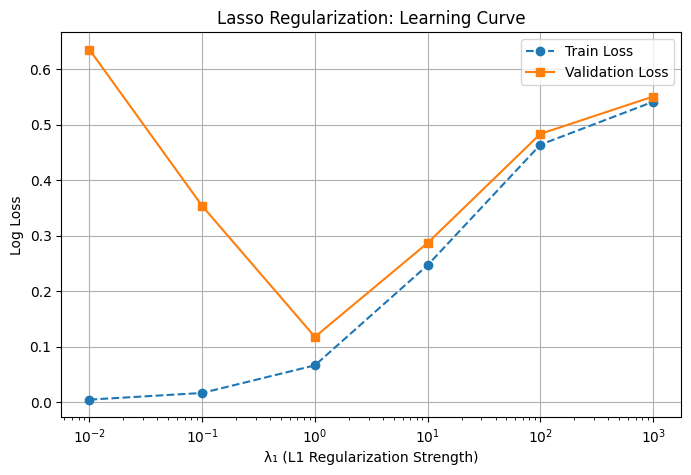

Best Lambda1:1.00
Test accuracy with Best Lambda1:0.9230769230769231


In [ ]:
# your code here
X=df
Y=Calories

#切分成90%訓練集與10%測試集
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,shuffle=True,random_state=12)
#設定折數
kf = KFold(n_splits=5, shuffle=True,random_state=12)

trainLoss=[]
valLoss=[]
#建立lambda1列表
lambda1Values = [0.01,0.1,1,10,100,1000]

for lambda1 in lambda1Values:
    C_values=1/lambda1  #根據lambda1計算C值
    train_loss_fold=[]
    val_loss_fold=[]
    
    for trainIndex , valIndex in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[trainIndex], X_train.iloc[valIndex]
        y_fold_train, y_fold_val = y_train.iloc[trainIndex], y_train.iloc[valIndex]
        
        model=linear_model.LogisticRegression(penalty="l1",C=C_values,solver="liblinear") #模型設定，solver選擇liblinear可用於二分類
        model.fit(X_fold_train,y_fold_train)
        train_loss_fold.append(log_loss(y_fold_train,model.predict_proba(X_fold_train)))  #收集訓練損失
        val_loss_fold.append(log_loss(y_fold_val,model.predict_proba(X_fold_val)))        #收集驗證損失
        
    trainLoss.append(np.mean(train_loss_fold))   #計算平均訓練損失
    valLoss.append(np.mean(val_loss_fold))       #計算平均驗證損失

#顯示結果
plt.figure(figsize=(8,5))
plt.plot(lambda1Values,trainLoss,marker='o',label="Train Loss",linestyle='dashed')
plt.plot(lambda1Values,valLoss,marker='s',label="Validation Loss",linestyle='solid')
plt.xscale('log')  # x軸改為對數
plt.xlabel("λ₁ (L1 Regularization Strength)")
plt.ylabel("Log Loss")
plt.legend()
plt.title("Lasso Regularization: Learning Curve")
plt.grid(True)
plt.show()

#找到最好的lambda1
bestLambda1=lambda1Values[np.argmin(valLoss)]
print(f"Best Lambda1:{bestLambda1:.2f}")

#訓練best model
bestModel=linear_model.LogisticRegression(penalty="l1",C=1/bestLambda1,solver='liblinear')
bestModel.fit(X_train,y_train)

y_pred=bestModel.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print(f"Test accuracy with Best Lambda1:{accuracy}")

In [21]:
# 計算非零特徵的數量
num_total_features = X_train.shape[1]
num_nonzero_features = np.sum(bestModel.coef_ != 0)

num_removed_features =num_total_features-num_nonzero_features

print(f"總特徵數量: {num_total_features}")
print(f"保留的特徵數量: {num_nonzero_features}")
print(f"被Lasso排除的特徵數量: {num_removed_features}")


總特徵數量: 21
保留的特徵數量: 13
被Lasso排除的特徵數量: 8


### c. 比較5(b)、6(a)和6(b)獲得的結果，哪個產生最佳準確率，為什麼 (4%)
- ans: {6(a)產生了96%的準確度為三者裡面最準的，推測是因為這一次給的數據中不同的特徵之間具有一定的相關性，若是利用L1正則化會導致部分特徵直接被清除，雖然有部分特徵對於這一次的數據集預測項目來說確實不太重要，因此使用L1依舊能得到很不錯的結果，但由於特徵相關性，還是使得L2正則化表現更佳。}